In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
from wordcloud import WordCloud

In [4]:
pio.templates.default = 'plotly_white'

In [5]:
# File required extra encoding parameters
data = pd.read_csv('Instagram data.csv', encoding='latin1')


In [6]:
data


Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
0           9       5    162              35        2   
1           7      14    224              48       10   
2          11       1    131              62       12   
3          10       7    213              23        8   
4           5       4    123               8        0   
..        ...     ...    ...             ...      ...   
114         2      38    373              73       80   
115         4       1    148              20       18   
116         0       1     92              34       10   
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
0    Here are some of the most important data visua...   
1    Here are some of the best data science project...   
2    Learn how to train a machine learning model an...   
3    Heres how you can write a Python program to d...   
4    Plotting annotations while visualizing your da...   
..                                                 ...   
114  Here are some of the best data science certifi...   
115  Clustering is a machine learning technique use...   
116  Clustering music genres is a task of grouping ...   
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
0    #finance #money #business #investing #investme...  
1    #healthcare #health #covid #data #datascience ...  
2    #data #datascience #dataanalysis #dataanalytic...  
3    #python #pythonprogramming #pythonprojects #py...  
4    #datavisualization #datascience #data #dataana...  
..                                                 ...  
114  #datascience #datasciencejobs #datasciencetrai...  
115  #machinelearning #machinelearningalgorithms #d...  
116  #machinelearning #machinelearningalgorithms #d...  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  

[119 rows x 13 columns]

In [7]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [8]:
columns_list = data.columns.tolist()

In [9]:
columns_list

['Impressions',
 'From Home',
 'From Hashtags',
 'From Explore',
 'From Other',
 'Saves',
 'Comments',
 'Shares',
 'Likes',
 'Profile Visits',
 'Follows',
 'Caption',
 'Hashtags']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [11]:
data.describe()

Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.088402   
min      22.000000    0.000000    0.000000   72.000000        4.000000   
25%      65.000000    4.000000    3.000000  121.500000       15.000000   
50%     109.000000    6.000000    6.000000  151.000000       23.000000   
75%     169.000000    8.000000   13.500000  204.000000       42.000000   
max    1095.000000   19.000000   75.000000  549.000000      611.000000   

          Follows  
count  119.000000  
mean    20.756303  
std     40.921580  
min      0.000000  
25%      4.000000  
50%      8.000000  
75%     18.000000  
max    260.000000

In [12]:
data.isnull()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0          False      False          False         False       False  False   
1          False      False          False         False       False  False   
2          False      False          False         False       False  False   
3          False      False          False         False       False  False   
4          False      False          False         False       False  False   
..           ...        ...            ...           ...         ...    ...   
114        False      False          False         False       False  False   
115        False      False          False         False       False  False   
116        False      False          False         False       False  False   
117        False      False          False         False       False  False   
118        False      False          False         False       False  False   

     Comments  Shares  Likes  Profile Visits  Follows  Caption  Hashtags  
0       False   False  False           False    False    False     False  
1       False   False  False           False    False    False     False  
2       False   False  False           False    False    False     False  
3       False   False  False           False    False    False     False  
4       False   False  False           False    False    False     False  
..        ...     ...    ...             ...      ...      ...       ...  
114     False   False  False           False    False    False     False  
115     False   False  False           False    False    False     False  
116     False   False  False           False    False    False     False  
117     False   False  False           False    False    False     False  
118     False   False  False           False    False    False     False  

[119 rows x 13 columns]

In [13]:
missing_values = data.isnull().sum()

In [14]:
missing_values

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [15]:
# No missing values

In [16]:
# Plot the Bar Graph
fig = px.bar(data, x = data.index, y = 'Impressions', title = 'Impressions Bar Chart')

# Customize the layout
fig.update_layout(
    xaxis_title = 'Post',
    yaxis_title = 'Impressions',)

# Show the chart
fig.show()


In [17]:
# Shows the number of impressions each post has achieved,
# some posts have gained spikes, two are massive outliers, 
# most postsare just under 5k impressions, 
# with spikes being generally around 10k - 15k.

In [18]:
# Total number of impressions
data['Impressions'].sum()

678775

In [19]:
# Total number of impressions gained 'from home'
data['From Home'].sum()

294619

In [20]:
# Total number of impressions gained 'from hashtags'
data['From Hashtags'].sum()

224614

In [21]:
# Total number of impressions gained 'from explore'
data['From Explore'].sum()

128294

In [22]:
# Total number of impressions gained 'from other'
data['From Other'].sum()

20360

In [23]:
# Calculate the sum of the impression references
from_home_sum = data['From Home'].sum()
from_hashtags_sum = data['From Hashtags'].sum()
from_explore_sum = data['From Explore'].sum()
from_other_sum = data['From Other'].sum()

# Create a DataFrame for the pie chart
impression_source_pie_data = pd.DataFrame({
    'Source': ['From Home', 'From Hashtags', 'From Explore', 'From Other'],
    'Sum': [from_home_sum, from_hashtags_sum, from_explore_sum, from_other_sum]})

# Create the pie chart
fig = px.pie(impression_source_pie_data, values = 'Sum', names = 'Source', title = 'Impressions Source Distribution')

# Show the chart
fig.show()


In [24]:
# The total number of impressions gained by all posts
total_impressions = data['Impressions'].sum()
total_impressions

678775

In [25]:
# Sum of the impressions gained from references
total_from_reach = from_home_sum + from_hashtags_sum + from_explore_sum + from_other_sum
total_from_reach

667887

In [26]:
# Impressions gained from other than references
total_impressions - total_from_reach

10888

In [27]:
# Create a stacked bar chart
fig = px.bar(data, x = data.index, y = ['From Home', 'From Hashtags', 'From Explore', 'From Other'],
             title = 'Impressions Referred Source Breakdown', labels = {'value': 'Impressions'},
             hover_data = {'value': ':,.0f'})

# Customize the layout
fig.update_layout(
    xaxis_title = 'Count',
    yaxis_title = 'Impressions',
    barmode ='stack',  # Stacked bar chart
    showlegend = True)

# Show the chart
fig.show()


In [28]:
# Shows the distribution of the references that lead to impressions gained 

In [29]:
# Create a line graph
fig = px.line(data, x = data.index, y = 'Impressions', title = 'Impressions Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title = 'Index',
    yaxis_title = 'Impressions',)

# Show the chart
fig.show()


In [30]:
# This graph shows the number of impressions of the posts in line graph form, 
# making overall and spike diistribution easier to understand.

In [31]:
# Create a line graph
fig = px.line(data, x = data.index, y = ['Likes', 'Saves', 'Follows', 'Comments', 'Shares', 'Profile Visits'],
              title = 'All Engagement Trends')

# Customize the layout
fig.update_layout(
    xaxis_title = 'Index',
    yaxis_title = 'Count',
    showlegend = True)

# Show the chart
fig.show()

In [32]:
# This graph show all the engagement metrics.
# Some are shown to be high figure factors, some are lower.
# The grpah can be split into two - facors regularly reaching to 500 - 1000,
# and factors not reaching quite such high counts.

In [33]:
# Create a line graph
fig = px.line(data, x = data.index, y = ['Likes', 'Saves', 'Profile Visits'],
              title = 'High Factor Engagement Trends')

# Customize the layout
fig.update_layout(
    xaxis_title = 'Index',
    yaxis_title = 'Count',
    showlegend = True)

# Show the chart
fig.show()


In [34]:
# These factors spike into 500 - 1000 counts.

In [35]:
# Create a line graph
fig = px.line(data, x = data.index, y = ['Comments', 'Shares', 'Follows'],
              title = 'Low Factor Engagement Trends')

# Customize the layout
fig.update_layout(
    xaxis_title = 'Index',
    yaxis_title = 'Count',
    showlegend = True)

# Show the chart
fig.show()

In [36]:
# These factors do not spike as high as the previous ones, 
# The max spikes here are around 200 - 250.
# Shares and Comments are still much lower than Follows.

In [37]:
# Create a line graph
fig = px.line(data, x = data.index, y = ['Comments', 'Shares'],
              title = 'Very Low Factor Engagement Trends')

# Customize the layout
fig.update_layout(
    xaxis_title = 'Index',
    yaxis_title = 'Count',
    showlegend = True)

# Show the chart
fig.show()

In [38]:
# The spikes here are less than 100.
# The general engagement rate in these factors is up to 20.

In [39]:
# Create the pie chart
fig = px.pie(impression_source_pie_data, values = 'Sum', names = 'Source', title = 'Impressions Source Distribution')

# Show the chart
fig.show()


In [40]:
# This pie chart shows the distribution of impressions from the various sources
# Almost half came Fom Home.
# Fromn Hashtags are second most common.
# This indicates that impressions were made mostly through already established preferences.

In [41]:
# Calculate the sums for each engagement metric
likes_sum = data['Likes'].sum()
saves_sum = data['Saves'].sum()
shares_sum = data['Shares'].sum()
comments_sum = data['Comments'].sum()

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({
    'Engagement Metric': ['Likes', 'Saves', 'Shares', 'Comments'],
    'Sum': [likes_sum, saves_sum, shares_sum, comments_sum]})

# Create the pie chart
fig = px.pie(pie_data, values = 'Sum', names = 'Engagement Metric', title = 'Engagement Metrics Distribution')

# Show the chart
fig.show()


In [42]:
# This pie chart shows engagement metric distribution.
# Over half of engagement was in the form of comments, 
# Almost all of the rest was in the form of likes.
# This indicates a high desire to interact with the post individually.

In [43]:
# Create a scatter plot (with a line of best fit)
fig=px.scatter(data, x='Profile Visits', y='Follows', trendline='ols', title='Scatter (Plot with Line of Best Fit)')

# Customize the layout
fig.update_layout(
    xaxis_title='Profile Visits',
    yaxis_title='Follows',)

# Show the chart
fig.show()


In [44]:
# This shows that there is some correlation between profile visits and follows but it could be stronger.
# There are also some outliers, without them, correlationwould probably be lower,
# indicating areas for strategy improvement.

In [46]:
hashtags_text = ' '.join(data['Hashtags'].dropna())


In [47]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)


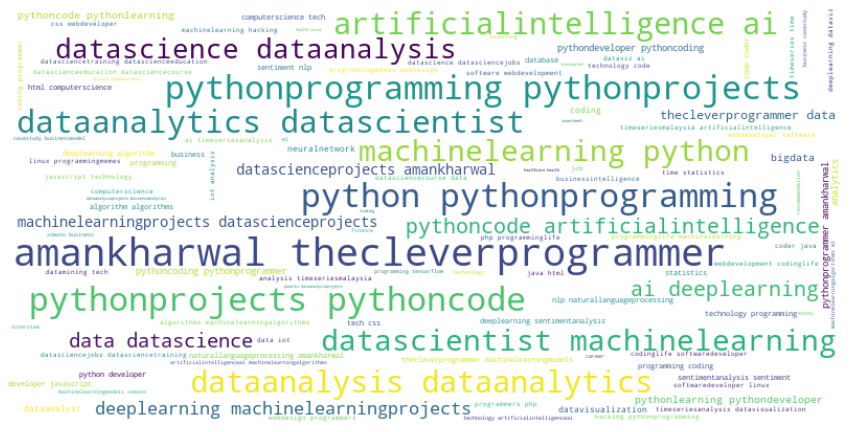

In [48]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


In [49]:
# CLearly, two of the most mentioned words were names of contributors
# Many words were python-coding related
# Themes such as & connected to DS, AI & ML were very prevalent in the data


In [50]:
# Feature vs feature correlation of the dataframe
correlation_matrix = data.corr()

# Creating a heatmap with Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='tempo')

# Customizing the layout
fig.update_layout(title='Correlation Matrix',
                  width=800,
                  height=800)

# Displaying the plot
fig.show()

In [ ]:
# This plot is showing the y-axis in an upsidw down manner
# This can be altered by using a reversed list of the features for the y-axis


In [54]:
# Reverse the order of columns for the y-axis
reversed_columns = list(reversed(correlation_matrix.columns))

# Creating a heatmap with Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=reversed_columns,  # Use the reversed order for the y-axis
                color_continuous_scale='tempo')

# Customizing the layout
fig.update_layout(title='Correlation Matrix',
                  width=800,
                  height=800)

# Displaying the plot
fig.show()


In [ ]:
# Here, the y-axis feature columns and x-axis feature columns are correct & matching
# There is generally a medium correlation , with a higher correlation in follows
# & a slightly higher correlation in follows
# Indicating that engagemant leads to follows for the users wishing to keep up to date


In [69]:
# Convert manual counts dictionary to a DataFrame for Plotly
df_ht = pd.DataFrame(list(hashtag_counts.items()), columns=['Hashtags', 'Count'])

# Plot the bar chart using Plotly
fig = px.bar(df_ht, x='Hashtags', y='Count', title='Number of Uses for Each Hashtag')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=list(df_ht['Hashtags']), ticktext=list(df_ht['Hashtags']))
fig.show()



In [ ]:
# The plots are in random order and labels are unreadable

In [70]:
# Sorting the hashtags into a descending order
df_ht_d = pd.DataFrame(list(sorted_hashtags), columns=['Hashtags', 'Count'])

# Plot the bar chart using Plotly (with completely vertical labels)
fig = px.bar(df_ht_d, x='Hashtags', y='Count', title='Number of Uses for Each Hashtag (Descending Order)')
fig.update_xaxes(tickangle=90)  # Set tickangle to 90 degrees for vertical labels
fig.update_traces(marker_color='skyblue')
fig.show()


In [ ]:
# The hashtags are in descending order and the labels are now easily readable
# ML, AI, Data, Python Code & the user Aman Kharwal are the most frequently used hashtags by far
# Other hastag use is mostly miniscule by comparision


In [133]:
data[['Likes','Hashtags']]

Likes                                           Hashtags
0      162  #finance #money #business #investing #investme...
1      224  #healthcare #health #covid #data #datascience ...
2      131  #data #datascience #dataanalysis #dataanalytic...
3      213  #python #pythonprogramming #pythonprojects #py...
4      123  #datavisualization #datascience #data #dataana...
..     ...                                                ...
114    373  #datascience #datasciencejobs #datasciencetrai...
115    148  #machinelearning #machinelearningalgorithms #d...
116     92  #machinelearning #machinelearningalgorithms #d...
117    549  #datascience #datasciencejobs #datasciencetrai...
118    443  #python #pythonprogramming #pythonprojects #py...

[119 rows x 2 columns]

In [123]:
df_ht

Hashtags  Count
0                      #finance      4
1                        #money      4
2                     #business     16
3                    #investing      4
4                   #investment      3
..                          ...    ...
159                        #sql      1
160                      #mysql      1
161                    #python3      2
162  #pythonprogramminglanguage      2
163                 #clustering      2

[164 rows x 2 columns]

In [190]:
count_likes = pd.DataFrame({
    'Hashtags': df_ht['Hashtags'].copy(),
    'Likes': [None] * len(df_ht)
})


In [191]:
count_likes

Hashtags Likes
0                      #finance  None
1                        #money  None
2                     #business  None
3                    #investing  None
4                   #investment  None
..                          ...   ...
159                        #sql  None
160                      #mysql  None
161                    #python3  None
162  #pythonprogramminglanguage  None
163                 #clustering  None

[164 rows x 2 columns]

In [192]:
# Calculating Likes for each Hastag
for i in range(len(count_likes)):
    hash_check = count_likes.at[i, 'Hashtags']

    # Find the row in 'data' where 'Hashtags' match
    match_row = data[data['Hashtags'].apply(lambda x: hash_check in x if isinstance(x, list) else False)]

    # Check if a match was found
    if not match_row.empty:
        count_likes.at[i, 'Likes'] = match_row.iloc[0]['Likes']
        print(f"Match found for '{hash_check}', Likes updated to {match_row.iloc[0]['Likes']}")
    else:
        print(f"No match found for '{hash_check}' in data")

# Print the updated 'count_likes' DataFrame
print("\nUpdated count_likes:")
print(count_likes)


Match found for '#finance', Likes updated to 162
Match found for '#money', Likes updated to 162
Match found for '#business', Likes updated to 162
Match found for '#investing', Likes updated to 162
Match found for '#investment', Likes updated to 162
Match found for '#trading', Likes updated to 162
Match found for '#stockmarket', Likes updated to 162
Match found for '#data', Likes updated to 162
Match found for '#datascience', Likes updated to 162
Match found for '#dataanalysis', Likes updated to 162
Match found for '#dataanalytics', Likes updated to 162
Match found for '#datascientist', Likes updated to 162
Match found for '#machinelearning', Likes updated to 162
Match found for '#python', Likes updated to 162
Match found for '#pythonprogramming', Likes updated to 162
Match found for '#pythonprojects', Likes updated to 162
Match found for '#pythoncode', Likes updated to 162
Match found for '#artificialintelligence', Likes updated to 162
Match found for '#ai', Likes updated to 162
Match 

In [193]:
count_likes

Hashtags Likes
0                      #finance   162
1                        #money   162
2                     #business   162
3                    #investing   162
4                   #investment   162
..                          ...   ...
159                        #sql   308
160                      #mysql   308
161                    #python3    86
162  #pythonprogramminglanguage    86
163                 #clustering   148

[164 rows x 2 columns]

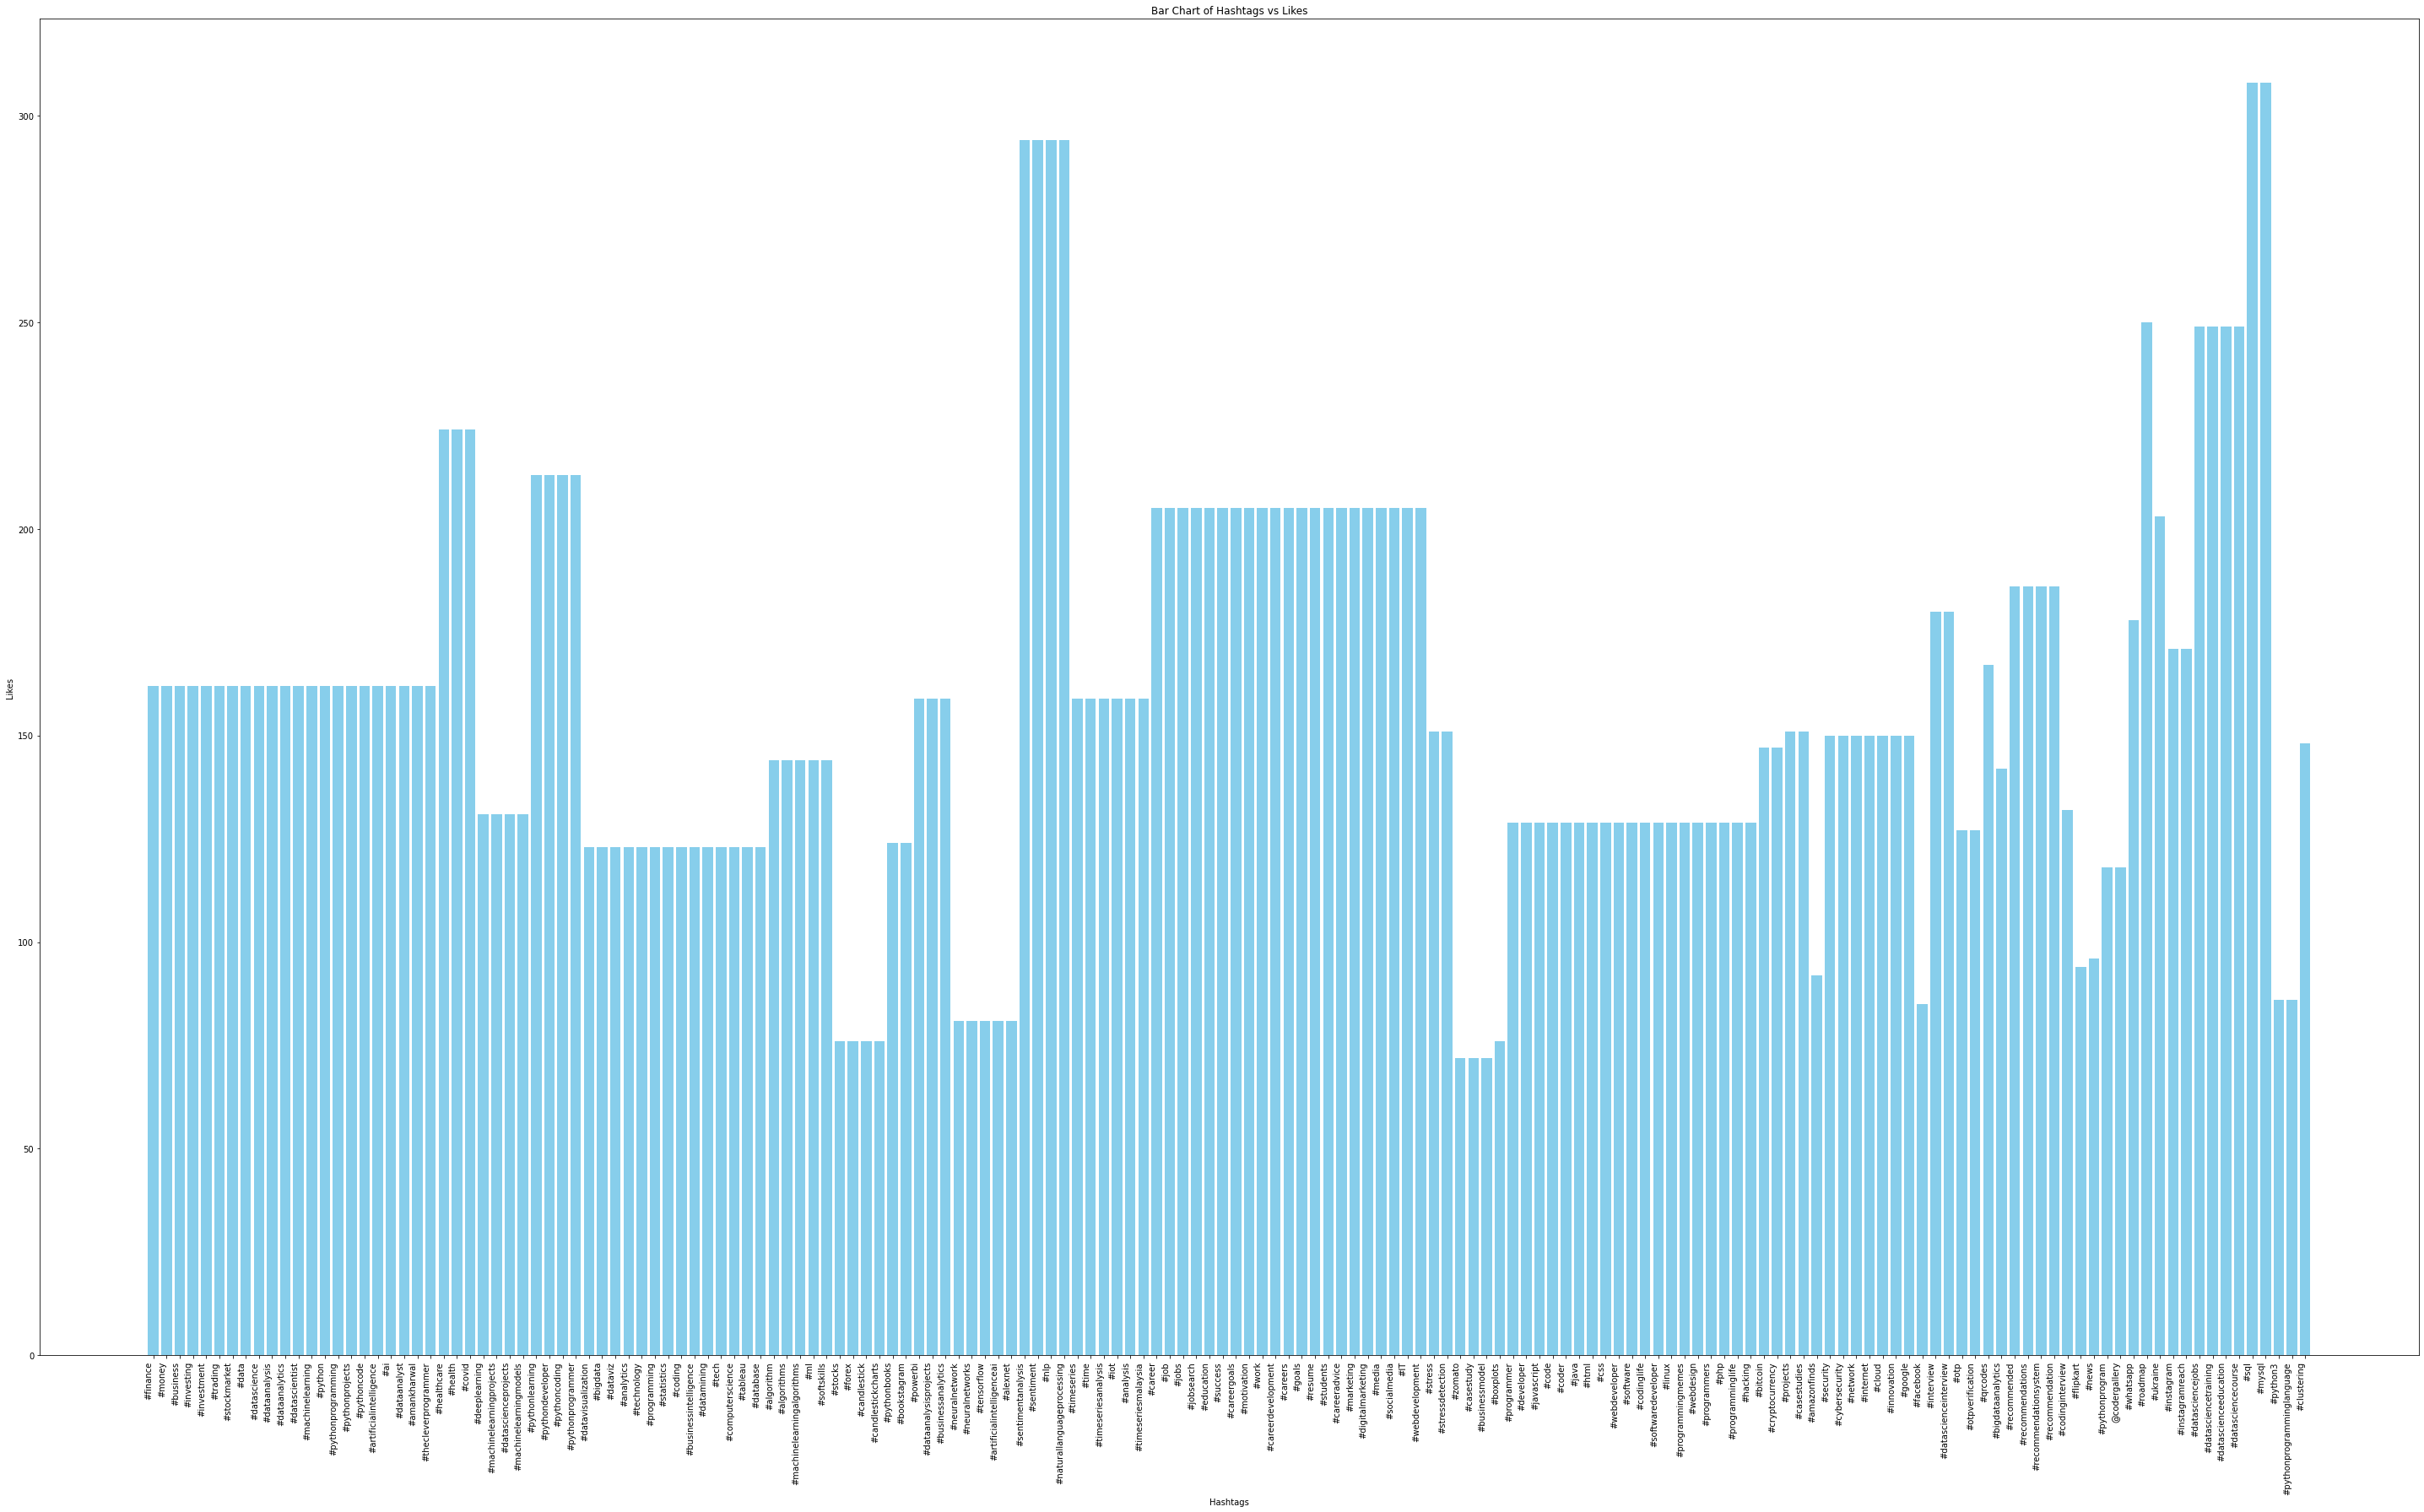

In [198]:
# Plotting the bar chart
plt.figure(figsize=(40, 25))
plt.bar(count_likes['Hashtags'], count_likes['Likes'], color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Likes')
plt.title('Bar Chart of Hashtags vs Likes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [213]:
# Create a bar chart in Plotly
fig = px.bar(count_likes, x='Hashtags', y='Likes',
             labels={'Likes': 'Count'},
             title='Bar Chart of Hashtags vs Likes',
             color='Likes',
             color_continuous_scale='Blues')

# Adjust the layout if needed
fig.update_layout(xaxis=dict(tickangle=90))

# Show the plot
fig.show()


In [206]:
count_impressions = pd.DataFrame({
    'Hashtags': df_ht['Hashtags'].copy(),
    'Impressions': [None] * len(df_ht)
})


In [207]:
count_impressions

Hashtags Impressions
0                      #finance        None
1                        #money        None
2                     #business        None
3                    #investing        None
4                   #investment        None
..                          ...         ...
159                        #sql        None
160                      #mysql        None
161                    #python3        None
162  #pythonprogramminglanguage        None
163                 #clustering        None

[164 rows x 2 columns]

In [223]:
# Calculating Impressions for each Hashtag
for i in range(len(count_impressions)):
    hash_check = count_impressions.at[i, 'Hashtags']

    # Find the row in 'data' where 'Hashtags' match for 'Impressions'
    match_row_impressions = data[data['Hashtags'].apply(lambda x: hash_check in x if isinstance(x, list) else False)]

    # Check if a match was found for 'Impressions'
    if not match_row_impressions.empty:
        count_impressions.at[i, 'Impressions'] = match_row_impressions.iloc[0]['Impressions']

# Print the updated 'count_impressions' DataFrame
print("\nUpdated count_impressions:")
count_impressions



Updated count_impressions:


Hashtags Impressions
0                      #finance        3920
1                        #money        3920
2                     #business        3920
3                    #investing        3920
4                   #investment        3920
..                          ...         ...
159                        #sql       17713
160                      #mysql       17713
161                    #python3        4842
162  #pythonprogramminglanguage        4842
163                 #clustering        5731

[164 rows x 2 columns]

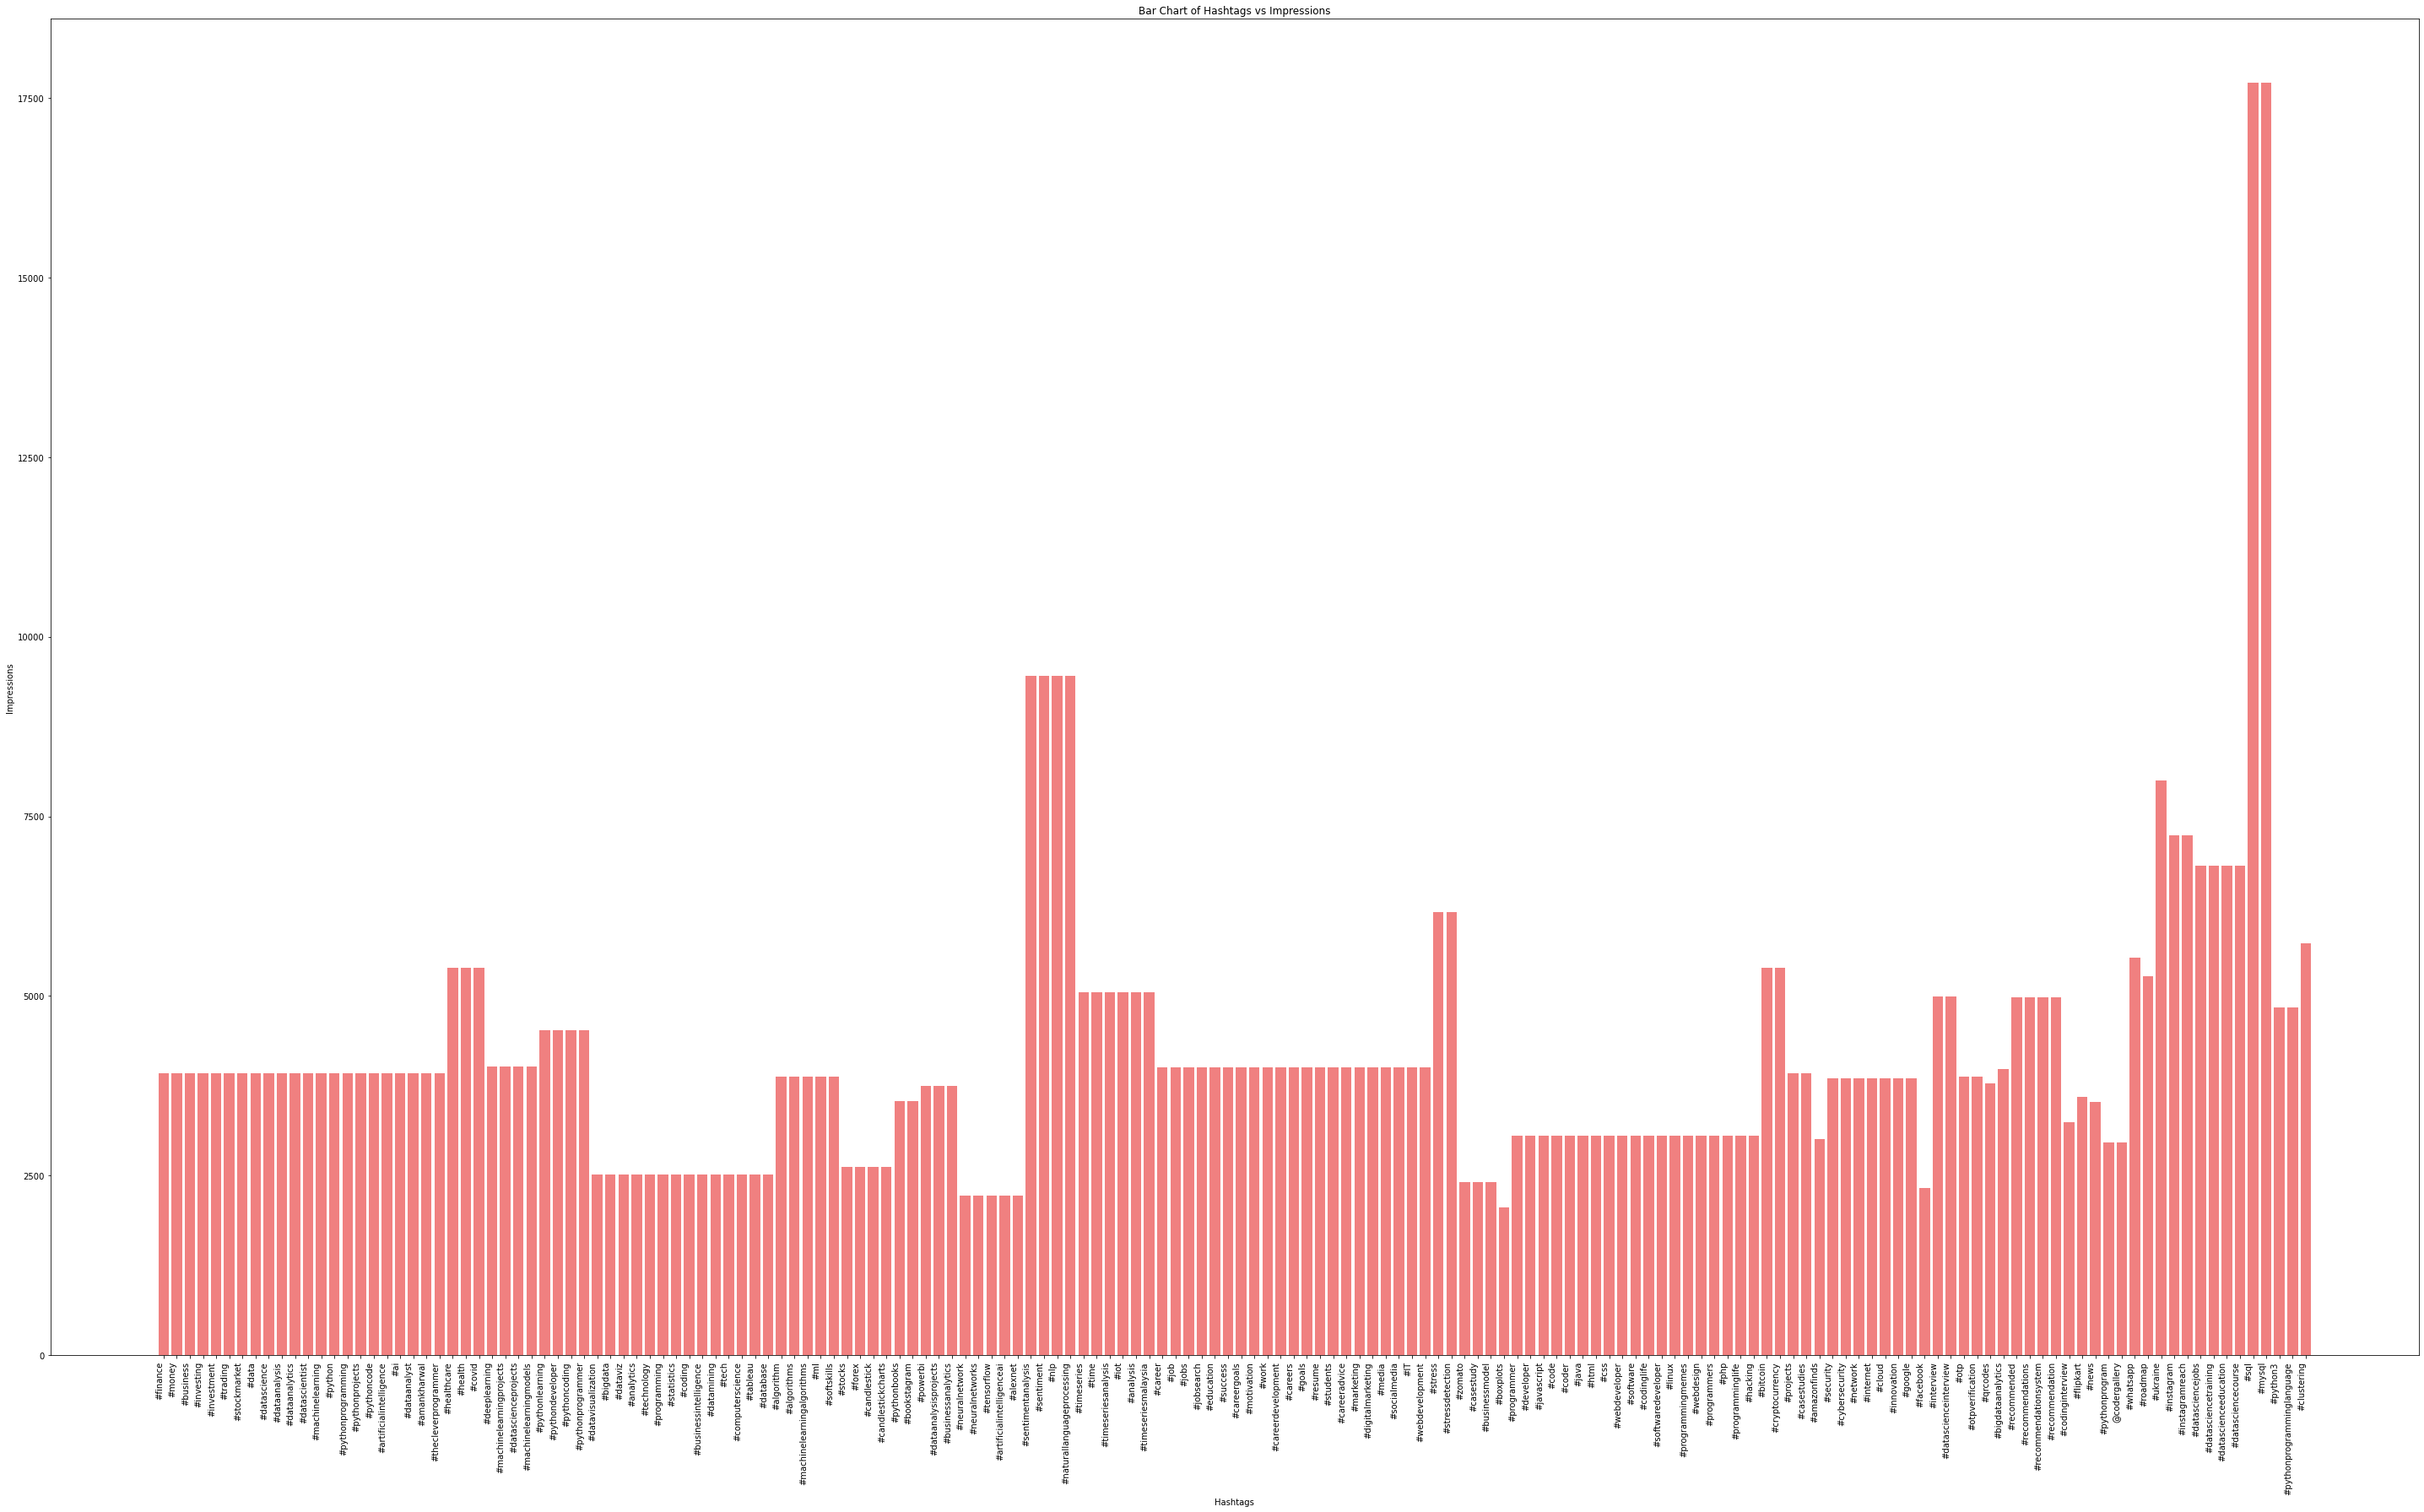

In [209]:
# Plotting the bar chart for count_impressions
plt.figure(figsize=(40, 25))
plt.bar(count_impressions['Hashtags'], count_impressions['Impressions'], color='lightcoral')
plt.xlabel('Hashtags')
plt.ylabel('Impressions')
plt.title('Bar Chart of Hashtags vs Impressions')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [214]:
# Create a bar chart in Plotly for count_impressions
fig = px.bar(count_impressions, x='Hashtags', y='Impressions',
             labels={'Impressions': 'Count'},
             title='Bar Chart of Hashtags vs Impressions',
             color='Impressions',
             color_continuous_scale='Reds')

# Adjust the layout if needed
fig.update_layout(xaxis=dict(tickangle=90))

# Show the plot
fig.show()


In [210]:
count_reach = pd.DataFrame({
    'Hashtags': df_ht['Hashtags'].copy(),
    'Likes': [None] * len(df_ht),
    'Impressions': [None] * len(df_ht)
})


In [211]:
for i in range(len(count_reach)):
    hash_check = count_reach.at[i, 'Hashtags']

    # Find the row in 'data' where 'Hashtags' match for 'Likes'
    match_row_likes = data[data['Hashtags'].apply(lambda x: hash_check in x if isinstance(x, list) else False)]

    # Check if a match was found for 'Likes'
    if not match_row_likes.empty:
        count_reach.at[i, 'Likes'] = match_row_likes.iloc[0]['Likes']

    # Find the row in 'data' where 'Hashtags' match for 'Impressions'
    match_row_impressions = data[data['Hashtags'].apply(lambda x: hash_check in x if isinstance(x, list) else False)]

    # Check if a match was found for 'Impressions'
    if not match_row_impressions.empty:
        count_reach.at[i, 'Impressions'] = match_row_impressions.iloc[0]['Impressions']

# Print the updated 'count_reach' DataFrame
print("\nUpdated count_reach:")
print(count_reach)



Updated count_reach:
                       Hashtags Likes Impressions
0                      #finance   162        3920
1                        #money   162        3920
2                     #business   162        3920
3                    #investing   162        3920
4                   #investment   162        3920
..                          ...   ...         ...
159                        #sql   308       17713
160                      #mysql   308       17713
161                    #python3    86        4842
162  #pythonprogramminglanguage    86        4842
163                 #clustering   148        5731

[164 rows x 3 columns]


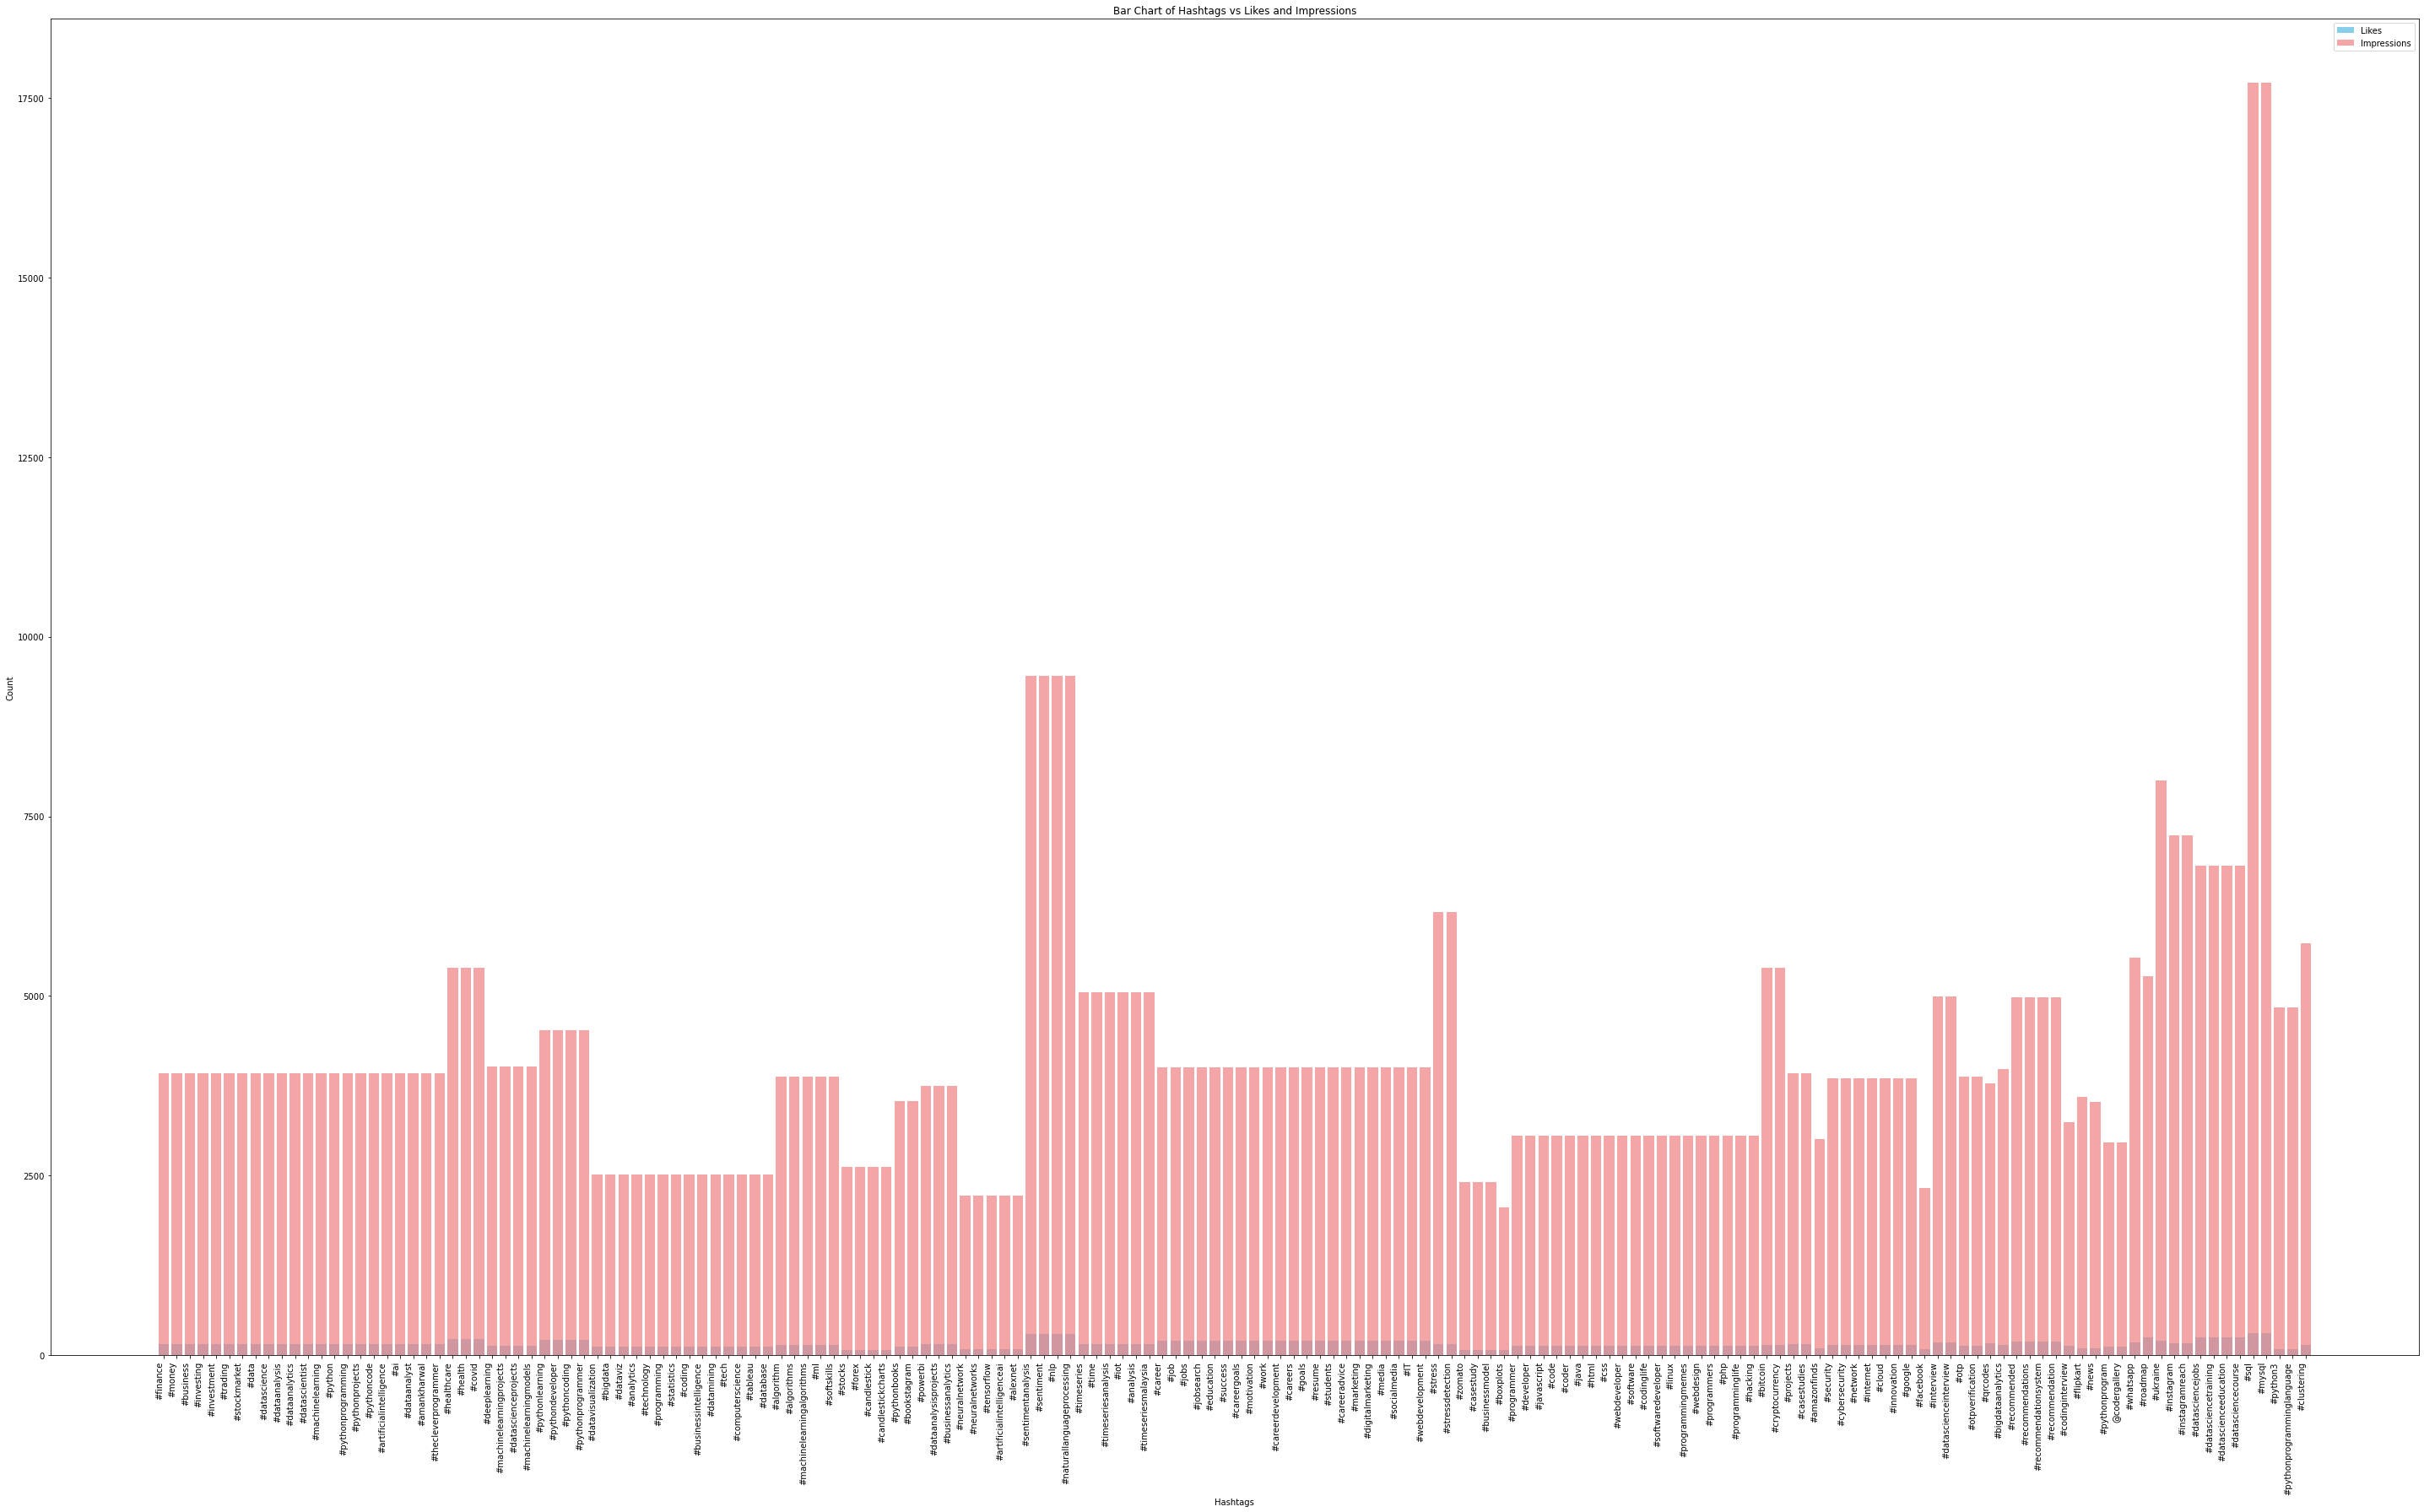

In [212]:
# Plotting the bar chart for count_reach
plt.figure(figsize=(40, 25))
plt.bar(count_reach['Hashtags'], count_reach['Likes'], color='skyblue', label='Likes')
plt.bar(count_reach['Hashtags'], count_reach['Impressions'], color='lightcoral', label='Impressions', alpha=0.7)
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Bar Chart of Hashtags vs Likes and Impressions')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [219]:
# Melt the DataFrame to have 'Likes' and 'Impressions' as a single column
count_reach_melted = count_reach.melt(id_vars=['Hashtags'], value_vars=['Likes', 'Impressions'],
                                      var_name='Metric', value_name='Count')

# Create a grouped bar chart in Plotly for count_reach with color scale and log scale
fig = px.bar(count_reach_melted, x='Hashtags', y='Count', color='Metric',
             labels={'Count': 'Count'},
             title='Bar Chart of Hashtags vs Likes and Impressions',
             color_continuous_scale='Viridis', 
             log_y=True,  # Using a logarithmic scale for the y-axis
             height=600)

# Adjust the layout if needed
fig.update_layout(xaxis=dict(tickangle=90))

# Show the plot
fig.show()
